In [93]:
# Decision Tree 

In [94]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split 
from sklearn import metrics 

In [95]:
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
# load dataset
diabetesdf = pd.read_csv("C:/Users/kdeep/Desktop/ML/diabetes.csv", header=None, names=col_names)

In [96]:
diabetesdf.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [97]:
#split dataset in features and target variable
feature_columns = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']
X = diabetesdf[feature_columns] # Features
y = diabetesdf.label # Target variable

In [98]:
# Split dataset into training set and test set
# 70% training and 30% test# Create Decision Tree classifer object
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) 
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [102]:
# Model Accuracy, how often is the classifier correct?
Dt_Acc = metrics.accuracy_score(y_test, y_pred)
print("Accuracy")
Dt_Acc
#print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy


0.6796536796536796

In [106]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
Dt_Entropy_Accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7705627705627706


In [107]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

print("Confusion Matrix: ")
print(confusion_matrix(y_test, y_pred))
print("Accuracy : ")
print(accuracy_score(y_test,y_pred)*100)
print("Report : ")
print(classification_report(y_test, y_pred))

Confusion Matrix: 
[[124  22]
 [ 31  54]]
Accuracy : 
77.05627705627705
Report : 
              precision    recall  f1-score   support

           0       0.80      0.85      0.82       146
           1       0.71      0.64      0.67        85

    accuracy                           0.77       231
   macro avg       0.76      0.74      0.75       231
weighted avg       0.77      0.77      0.77       231



In [108]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [109]:
from sklearn.tree import export_graphviz
export_graphviz(model, 'tree.dot', feature_names = feature_columns)

In [110]:
! dot -Tpng tree.dot -o tree.png

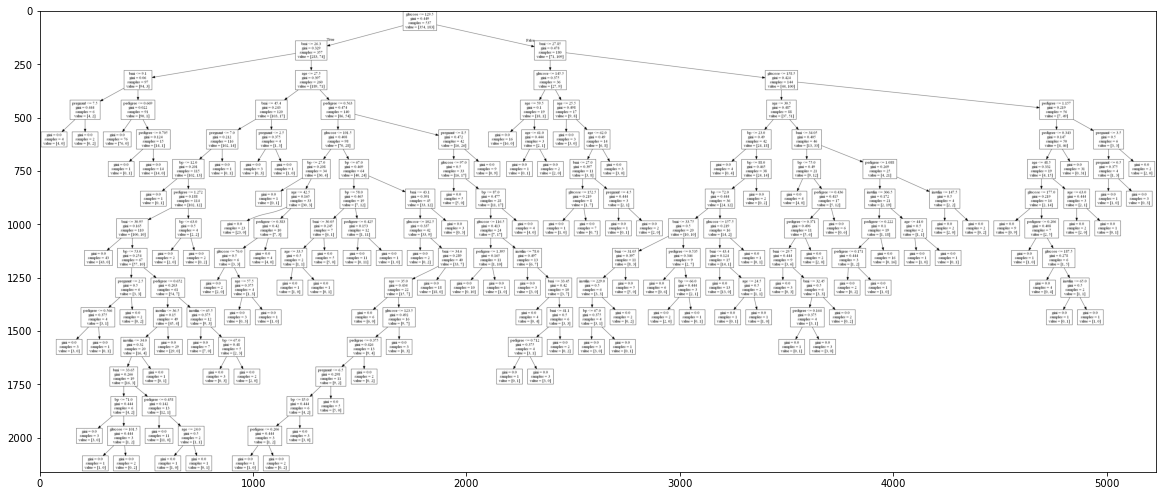

In [111]:
import matplotlib.pyplot as plt
import cv2
%matplotlib inline
img = cv2.imread('tree.png')
plt.figure(figsize = (20, 20))
plt.imshow(img)

In [112]:
#Logistic Regression

In [113]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [114]:
strokekdf = pd.read_csv("C:/Users/kdeep/Desktop/ML/healthcare-dataset-stroke-data.csv")

In [115]:
strokekdf.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [28]:
strokekdf_Columns = strokekdf.columns.tolist()
strokekdf[strokekdf_Columns].isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [32]:
strokedf =strokekdf.dropna(axis='rows').head()

In [33]:
strokedf_Columns = strokedf.columns.tolist()
strokedf[strokedf_Columns].isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [34]:
#split dataset in features and target variable
feature_cols = ['age', 'hypertension', 'heart_disease', 'avg_glucose_level','bmi']
X = strokedf[feature_cols] # Features
y = strokedf.stroke # Target variable

In [35]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [36]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train,y_train)

#
y_pred=logreg.predict(X_test)

ValueError: This solver needs samples of at least 2 classes in the data, but the data contains only one class: 1

In [116]:
#Logistic Regression

In [117]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [118]:
Mobiledf = pd.read_csv("C:/Users/kdeep/Desktop/ML/Mobile_purchase.csv")

In [119]:
Mobiledf.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [120]:
Mobiledf.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [121]:
feature_cols = ['battery_power', 'blue', 'clock_speed','dual_sim', 'fc', 'four_g', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores',
            'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g', 'touch_screen', 'wifi']

In [122]:
X = Mobiledf[feature_cols] # Features
y = Mobiledf.price_range # Target variable

In [123]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [124]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [125]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train,y_train)

#
y_pred=logreg.predict(X_test)


In [126]:
# import the metrics class
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[122,   2,   0,   0],
       [  3, 103,   4,   0],
       [  0,   5, 116,   4],
       [  0,   0,   1, 140]], dtype=int64)

In [127]:
lr_Acc = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print(classification_report(y_test,y_pred))

Accuracy: 0.962
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       124
           1       0.94      0.94      0.94       110
           2       0.96      0.93      0.94       125
           3       0.97      0.99      0.98       141

    accuracy                           0.96       500
   macro avg       0.96      0.96      0.96       500
weighted avg       0.96      0.96      0.96       500



In [128]:
# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 257.44, 'Predicted label')

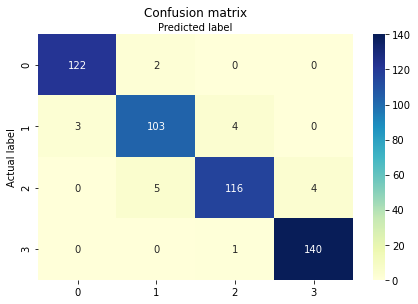

In [129]:
class_names=[0,1,2,3] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [130]:
#Naive Bayes

In [131]:
import pandas as pd
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [132]:
GNB_Mobiledf = pd.read_csv("C:/Users/kdeep/Desktop/ML/Mobile_purchase.csv")

In [133]:
GNB_Mobiledf.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [134]:
GNB_Mobiledf.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [135]:
feature_cols = ['battery_power', 'blue', 'clock_speed','dual_sim', 'fc', 'four_g', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores',
            'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g', 'touch_screen', 'wifi']

In [136]:
X = Mobiledf[feature_cols] # Features
y = Mobiledf.price_range # Target variable

In [137]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

In [138]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3,random_state=109) # 70% training and 30% test

In [139]:
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
gnb = GaussianNB()

#Train the model using the training sets
gnb.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = gnb.predict(X_test)

In [141]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
GNB_Acc = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8183333333333334


In [142]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.92      0.92       159
           1       0.71      0.73      0.72       141
           2       0.72      0.72      0.72       151
           3       0.91      0.90      0.91       149

    accuracy                           0.82       600
   macro avg       0.82      0.82      0.82       600
weighted avg       0.82      0.82      0.82       600



In [143]:
#Support Vector Machine

In [144]:
import pandas as pd
import numpy as np
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [145]:
SVM_Mobiledf = pd.read_csv("C:/Users/kdeep/Desktop/ML/Mobile_purchase.csv")

In [146]:
SVM_Mobiledf.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [147]:
SVM_Mobiledf.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [148]:
feature_cols = ['battery_power', 'blue', 'clock_speed','dual_sim', 'fc', 'four_g', 'int_memory', 'm_dep', 'mobile_wt', 
                'n_cores','pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g', 'touch_screen', 
                'wifi']

In [149]:
X = GNB_Mobiledf[feature_cols] # Features
y = GNB_Mobiledf.price_range # Target variable

In [150]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

In [151]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3,random_state=109) # 70% training and 30% test

In [152]:
#Import svm model
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [153]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
SVM_Acc = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9766666666666667


In [154]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98       159
           1       0.95      0.96      0.96       141
           2       0.97      0.97      0.97       151
           3       1.00      0.99      0.99       149

    accuracy                           0.98       600
   macro avg       0.98      0.98      0.98       600
weighted avg       0.98      0.98      0.98       600



In [155]:
model_ev = pd.DataFrame({'Model': ['Logistic Regression','Naive Bayes','Support Vector Machine'], 'Accuracy': [lr_Acc*100,
                    GNB_Acc*100,SVM_Acc*100]})
model_ev

,Model,Accuracy
0,Logistic Regression,96.200000
1,Naive Bayes,81.833333
2,Support Vector Machine,97.666667


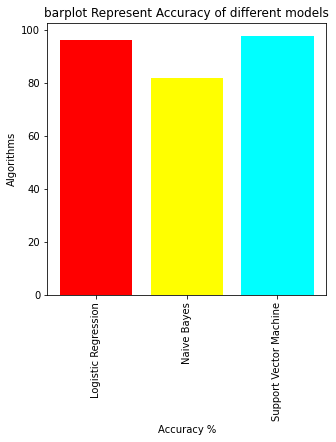

In [157]:
colors = ['red','yellow','cyan']
plt.figure(figsize=(5,5))
plt.title("barplot Represent Accuracy of different models")
plt.xlabel("Accuracy %")
plt.xticks(rotation=90)
plt.ylabel("Algorithms")
plt.bar(model_ev['Model'],model_ev['Accuracy'],color = colors)
plt.show()